<ipython-input-5-66bb43218a38>:33: RuntimeWarning: divide by zero encountered in log
  magnitude3 = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
<ipython-input-5-66bb43218a38>:34: RuntimeWarning: divide by zero encountered in log
  magnitude4 = 20*np.log(cv2.magnitude(f_ishift[:,:,0],f_ishift[:,:,1]))


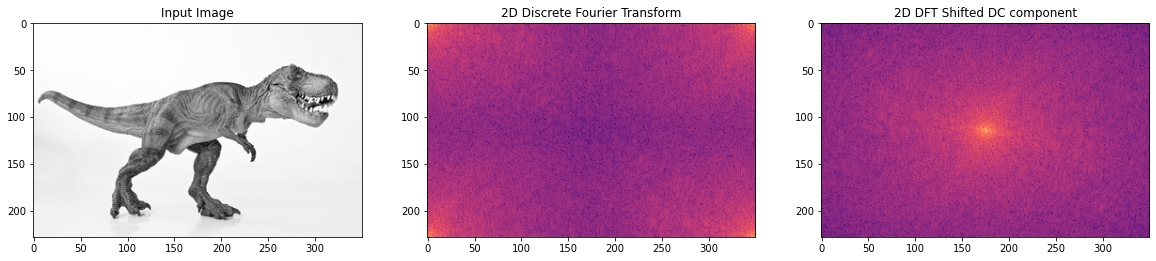

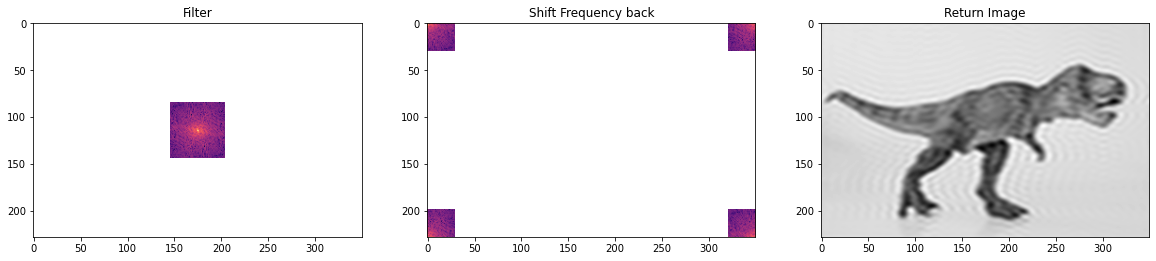

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Open an image and show
path = r'../images/trex.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude1 = 20*np.log(cv2.magnitude(dft[:,:,0],dft[:,:,1]))
magnitude2 = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].set(title='Input Image')
ax[0].imshow(image, cmap='gray')
ax[1].set(title='2D Discrete Fourier Transform')
ax[1].imshow(magnitude1, cmap='magma')
ax[2].set(title='2D DFT Shifted DC component')
ax[2].imshow(magnitude2, cmap='magma')

rows, cols = image.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
magnitude3 = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
magnitude4 = 20*np.log(cv2.magnitude(f_ishift[:,:,0],f_ishift[:,:,1]))
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

fig2, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].set(title='Filter')
ax[0].imshow(magnitude3, cmap='magma')
ax[1].set(title='Shift Frequency back')
ax[1].imshow(magnitude4, cmap='magma')
ax[2].set(title='Return Image')
ax[2].imshow(img_back, cmap='gray')